<a href="https://colab.research.google.com/github/rayhanfaris17/text_claasification_twitter/blob/main/Text_Classification_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [ ]:
!pip install -q kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

In [ ]:
import string
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!kaggle datasets download -d reihanenamdari/mental-health-corpus

  0% 0.00/4.74M [00:00<?, ?B/s]
100% 4.74M/4.74M [00:00<00:00, 85.3MB/s]


In [ ]:
!unzip mental-health-corpus.zip


Archive:  mental-health-corpus.zip
  inflating: mental_health.csv       


In [ ]:
df = pd.read_csv('mental_health.csv')
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [ ]:
sample_size = 2000  # Ukuran sampel yang diinginkan
random_sample = df.sample(n=sample_size)

# Menyimpan sampel acak ke file CSV
random_sample.to_csv('mental_health.csv', index=False)

In [ ]:
df = pd.read_csv('mental_health.csv')
df

,text,label
0,im going tonightcan someone tell many dolipran...,1
1,im currently looking little electro shockers a...,0
2,tomorrowim gonna try itim pretty scared idk it...,1
3,yall please spam post comments im going bed wa...,0
4,like think reasonably intelligent human beings...,0
...,...,...
1995,suffered concussioneverybody ecerythinm feelin...,1
1996,damn ever cry someone saw something made think...,0
1997,life fell apart giving upmy life fell apart sh...,1
1998,really well made movie sumitra bhave always ma...,0


In [ ]:
df.dtypes

text     object
label     int64
dtype: object

In [ ]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
df['label'] = df['label'].replace({'Negative': 0, 'Positive': 1})
df

,text,label
0,speaking megathiccc gc rn isnt funnyinterestin...,0
1,im going hang myselfim tired cant stand alive ...,1
2,go doctors go doctorsso basically im pretty su...,1
3,emdr sessions great success also want go becam...,1
4,cant anything right moreno matter hard try mat...,1
...,...,...
4995,wishthat halloween michael myers stop stab rip...,1
4996,im dueling someone five minutes wish luck upda...,0
4997,everyone pities looks mental illnesses cannot ...,1
4998,one call want know anyone alone without feelin...,1


1    1006
0     994
Name: label, dtype: int64


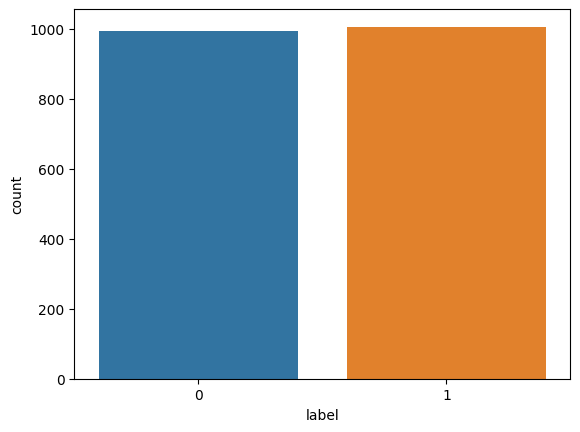

In [ ]:
sns.countplot(x='label', data=df)
print(df['label'].value_counts())


In [ ]:
# clean_sentence = []
# for sentence in df["text"]:
#     def hapus_tanda(sentence):
#         tanda_baca = set(string.punctuation)
#         sentence = ''.join(ch for ch in sentence if ch not in tanda_baca)
#         return sentence

#     sentence=sentence.lower()
#     sentence = re.sub(r'\\u\w\w\w\w', '', sentence)
#     sentence=re.sub(r'http\S+','',sentence)
#     sentence=re.sub('@[^\s]+','',sentence)
#     sentence = re.sub(r'#([^\s]+)', r'\1', sentence)
#     sentence=hapus_tanda(sentence)
#     sentence=re.sub(r'\w*\d\w*', '',sentence).strip()

#     #stemming
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     sentence = stemmer.stem(sentence)
#     clean_sentence.append(sentence)

# df['clean'] = clean_sentence


In [ ]:
df.head()

,text,label
0,im going tonightcan someone tell many dolipran...,1
1,im currently looking little electro shockers a...,0
2,tomorrowim gonna try itim pretty scared idk it...,1
3,yall please spam post comments im going bed wa...,0
4,like think reasonably intelligent human beings...,0


#**BAG OF WORDS**

In [ ]:
# Convert text to numerical features using bag-of-words approach
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df['text']).toarray()
X_test = df["label"]

# Define the test data using splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,X_test,test_size=0.2,random_state=0)
X_train.shape , y_test.shape

# Train a Naive Bayes classifier
nbModel = MultinomialNB()
nbModel.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nbModel.predict(X_test)

# Print the predicted labels
print(classification_report(y_test, y_pred))

# Calculate the accuracy of the classifier
acc = accuracy_score(y_train, nbModel.predict(X_train))

              precision    recall  f1-score   support

           0       0.97      0.62      0.76       190
           1       0.74      0.98      0.84       210

    accuracy                           0.81       400
   macro avg       0.85      0.80      0.80       400
weighted avg       0.85      0.81      0.80       400



In [ ]:
tes_data = "this tweet is my last. i want to end my life"

s = [tes_data]
new_X_test = vectorizer.transform(s).toarray()
pred = nbModel.predict(new_X_test)
print(f"kalimat ({tes_data}), bermuatan {pred[0]}")

kalimat (this tweet is my last. i want to end my life), bermuatan 1


#**TfidfVectorizer**

In [ ]:
df.dtypes

text     object
label     int64
dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [ ]:

# Create a TfidfVectorizer object with the specified maximum number of features
tfidfvectorizer = TfidfVectorizer()

# Create a MultinomialNB object for classification
nbModel = MultinomialNB()

X = tfidfvectorizer.fit_transform(df['text']).toarray()
Y =  df["label"]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape , y_test.shape

nbModel.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nbModel.predict(X_test)

# Print the predicted labels
print(classification_report(y_test, y_pred))

# Calculate the accuracy of the classifier
acc = accuracy_score(y_train, nbModel.predict(X_train))


              precision    recall  f1-score   support

           0       0.99      0.56      0.71       187
           1       0.72      1.00      0.83       213

    accuracy                           0.79       400
   macro avg       0.85      0.78      0.77       400
weighted avg       0.85      0.79      0.78       400



In [ ]:
tes_data = "bruno funny word bruno bruno bruno bruno bruno"
s = [tes_data]
x_uji = tfidfvectorizer.transform(s).toarray()
preds = nbModel.predict(x_uji)
print(f"kalimat ({tes_data}), bermuatan {preds[0]}")

kalimat (bruno funny word bruno bruno bruno bruno bruno), bermuatan 0


#**NGRAMS**

In [ ]:

# Define the n-gram range and the maximum number of features
ngram_range = (1, 2)
max_features = 1000

# Create a CountVectorizer object with the specified n-gram range and maximum number of features
vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=max_features)

neg_data = vectorizer.fit_transform(df['text']).toarray()
pos_data =  df["label"]
X_train,X_test,y_train,y_test = train_test_split(neg_data,pos_data,test_size=0.2,random_state=42)
X_train.shape , y_test.shape
# Create a MultinomialNB object for classification
nmModel = MultinomialNB()

# Train the pipeline on the training data and labels
nbModel.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nbModel.predict(X_test)

# Print the predicted labels
print(classification_report(y_test, y_pred))

# Calculate the accuracy of the classifier
acc = accuracy_score(y_train, nbModel.predict(X_train))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       187
           1       0.78      0.95      0.85       213

    accuracy                           0.83       400
   macro avg       0.85      0.82      0.82       400
weighted avg       0.84      0.83      0.82       400



In [ ]:
tes_data = "this is my last post in instagram. i want to end my life"

s = [tes_data]
new_X_test = vectorizer.transform(s).toarray()
pred = nbModel.predict(new_X_test)
print(f"kalimat ({tes_data}), bermuatan {pred[0]}")

kalimat (this is my last post in instagram. i want to end my life), bermuatan 1


#**WORD EMBEDDING - WORD2VEC**

In [ ]:
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
# Define the dimension of the word embeddings
embedding_dim = 100

# Define the training data and labels
training_data = df['text']
training_labels = df["label"]

X_train,X_test,y_train,y_test = train_test_split(training_data,training_labels,test_size=0.2,random_state=0)

# Tokenize the training data
tokenized_training_data = [sentence.split() for sentence in training_data]

# Train the Word2Vec model on the tokenized training data
model = Word2Vec(sentences=tokenized_training_data, vector_size=embedding_dim, window=5, min_count=1, workers=4)

# Define the test data and labels
test_data = X_test
test_labels = y_test

# Tokenize the test data
tokenized_test_data = [sentence.split() for sentence in test_data]

# Get the embeddings for the training and test data
training_data_embeddings = []
for sentence in tokenized_training_data:
    embeddings = [model.wv[word] for word in sentence if word in model.wv]
    if embeddings:
        training_data_embeddings.append(sum(embeddings) / len(embeddings))
    else:
        training_data_embeddings.append([0] * embedding_dim)

test_data_embeddings = []
for sentence in tokenized_test_data:
    embeddings = [model.wv[word] for word in sentence if word in model.wv]
    if embeddings:
        test_data_embeddings.append(sum(embeddings) / len(embeddings))
    else:
        test_data_embeddings.append([0] * embedding_dim)

# Train a logistic regression classifier on top of the embeddings
classifier = LogisticRegression()
classifier.fit(training_data_embeddings, training_labels)

# Use the classifier to predict the labels for the test data
predicted_labels = classifier.predict(test_data_embeddings)

# Print the predicted labels and classification report for the test data
# print(predicted_labels)
print(classification_report(test_labels, predicted_labels))


              precision    recall  f1-score   support

           0       0.79      0.72      0.75       190
           1       0.77      0.83      0.80       210

    accuracy                           0.78       400
   macro avg       0.78      0.77      0.78       400
weighted avg       0.78      0.78      0.78       400



#**WORD EMBEDDING - GLOVE**


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.utils import pad_sequences
from keras.callbacks import EarlyStopping

In [ ]:
# Memisahkan teks dan label
X = df['text']
y = df['label']

# Melakukan pembagian dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Melakukan encoding pada label
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
# Melakukan tokenisasi teks
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Menghitung jumlah kata unik (vocab_size)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Melakukan padding pada teks
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-06-07 00:04:44--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-06-07 00:04:44--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-06-07 00:04:44--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
sqmodel = Sequential()
sqmodel.add(Embedding(vocab_size, 100, input_length=max_len))
sqmodel.add(LSTM(100))
sqmodel.add(Dense(1, activation='sigmoid'))

sqmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Inisialisasi EarlyStopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

In [ ]:
# Pelatihan model dengan loop pelatihan manual
epochs = 5
batch_size = 32
min_val_loss = float('inf')  # Inisialisasi variabel min_val_loss

for epoch in range(epochs):
    print('Epoch', epoch+1)

    # Inisialisasi penghitung loss dan akurasi
    train_loss = 0.0
    train_acc = 0.0

    # Loop melalui setiap batch data latih
    num_batches = len(X_train) // batch_size
    for batch in range(num_batches):
        start = batch * batch_size
        end = (batch + 1) * batch_size

        # Ambil batch data dan label
        batch_X = X_train[start:end]
        batch_y = y_train[start:end]

        # Melakukan pelatihan pada batch
        loss, acc = sqmodel.train_on_batch(batch_X, batch_y)

        # Mengupdate penghitung loss dan akurasi
        train_loss += loss
        train_acc += acc

    # Menghitung rata-rata loss dan akurasi pada setiap epoch
    train_loss /= num_batches
    train_acc /= num_batches

    # Evaluasi model pada data validasi
    val_loss, val_acc = sqmodel.evaluate(X_test, y_test, verbose=0)

    # Menampilkan hasil pelatihan pada setiap epoch
    print('Train - Loss:', train_loss, '- Accuracy:', train_acc)
    print('Validation - Loss:', val_loss, '- Accuracy:', val_acc)

    # Menghentikan pelatihan jika Early Stopping terpenuhi
    if early_stopping and val_loss <= min_val_loss:
        min_val_loss = val_loss  # Memperbarui min_val_loss
    else:
        print('Early Stopping!')
        break

Epoch 1
Train - Loss: 0.5690351998806 - Accuracy: 0.69125
Validation - Loss: 0.38475674390792847 - Accuracy: 0.8500000238418579
Epoch 2
Train - Loss: 0.24523773789405823 - Accuracy: 0.92125
Validation - Loss: 0.28760865330696106 - Accuracy: 0.8774999976158142
Epoch 3
Train - Loss: 0.08335315693169833 - Accuracy: 0.9775
Validation - Loss: 0.3996613621711731 - Accuracy: 0.8725000023841858
Early Stopping!


In [ ]:
y_pred = sqmodel.predict(X_test)
y_pred = np.round(y_pred).astype(int)

# Mendekode label menjadi bentuk awal
y_pred = le.inverse_transform(y_pred)
y_test = le.inverse_transform(y_test)

# Menampilkan hasil presisi, recall, f1-score, dan support
report = classification_report(y_test, y_pred)
print(report)

13/13 [==============================] - 1s 26ms/step
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       187
           1       0.95      0.80      0.87       213

    accuracy                           0.87       400
   macro avg       0.88      0.88      0.87       400
weighted avg       0.88      0.87      0.87       400



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#**WORD EMBEDDING - FASTTEXT**


In [ ]:
from gensim.models import FastText
from sklearn.linear_model import LogisticRegression
# Define the dimension of the word embeddings
embedding_dim = 100

# Define the training data and labels
training_data = df['text']
training_labels = df["label"]

X_train,X_test,y_train,y_test = train_test_split(training_data,training_labels,test_size=0.2,random_state=0)

# Tokenize the training data
tokenized_training_data = [sentence.split() for sentence in training_data]

# Train the FastText model on the tokenized training data
model = FastText(sentences=tokenized_training_data, vector_size=embedding_dim, window=5, min_count=1, workers=4)

# Define the test data and labels
test_data = X_test
test_labels = y_test

# Tokenize the test data
tokenized_test_data = [sentence.split() for sentence in test_data]

# Get the embeddings for the training and test data
training_data_embeddings = []
for sentence in tokenized_training_data:
    embeddings = [model.wv[word] for word in sentence if word in model.wv]
    if embeddings:
        training_data_embeddings.append(sum(embeddings) / len(embeddings))
    else:
        training_data_embeddings.append([0] * embedding_dim)

test_data_embeddings = []
for sentence in tokenized_test_data:
    embeddings = [model.wv[word] for word in sentence if word in model.wv]
    if embeddings:
        test_data_embeddings.append(sum(embeddings) / len(embeddings))
    else:
        test_data_embeddings.append([0] * embedding_dim)

# Train a logistic regression classifier on top of the embeddings
classifier = LogisticRegression()
classifier.fit(training_data_embeddings, training_labels)

# Use the classifier to predict the labels for the test data
predicted_labels = classifier.predict(test_data_embeddings)

# Print the predicted labels and classification report for the test data
# print(predicted_labels)
print(classification_report(test_labels, predicted_labels))


              precision    recall  f1-score   support

           0       0.80      0.74      0.77       190
           1       0.78      0.83      0.80       210

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



#**BERT**


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.1 MB/s eta 0:00:00


In [ ]:

import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
import tensorflow as tf
from transformers import AutoModel, BertTokenizerFast, TFBertModel
from tensorflow import keras
# specify GPU
device = torch.device("cuda")

In [ ]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

bert_model = TFBertModel.from_pretrained('bert-base-uncased')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
train_tokens = tokenizer.batch_encode_plus(
    training_data.tolist(),
    max_length=128,
    truncation=True,
    padding='max_length',
    return_tensors='tf'
)

test_tokens = tokenizer.batch_encode_plus(
    test_data.tolist(),
    max_length=128,
    truncation=True,
    padding='max_length',
    return_tensors='tf'
)

# Membuat model klasifikasi menggunakan BERT
input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32)
attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32)
bert_output = bert_model(input_ids, attention_mask=attention_mask)[0]
output = tf.keras.layers.Dense(units=2, activation='softmax')(bert_output[:, 0, :])

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)
# bert_model.trainable = True

# Melakukan kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model pada data training
model.fit(
    [train_tokens['input_ids'], train_tokens['attention_mask']],
    training_labels,
    epochs=5,
    batch_size=16
)

# Mengevaluasi model pada data testing
loss, accuracy = model.evaluate(
    [test_tokens['input_ids'], test_tokens['attention_mask']],
    test_labels,
    verbose=2
)

Epoch 1/5


125/125 [==============================] - 3379s 27s/step - loss: 0.8263 - accuracy: 0.5065
Epoch 2/5
125/125 [==============================] - 3339s 27s/step - loss: 0.8823 - accuracy: 0.4935
Epoch 3/5
125/125 [==============================] - 3337s 27s/step - loss: 0.7021 - accuracy: 0.5080
Epoch 4/5
125/125 [==============================] - 3339s 27s/step - loss: 0.6999 - accuracy: 0.4935
Epoch 5/5
125/125 [==============================] - 3356s 27s/step - loss: 0.6997 - accuracy: 0.4970
13/13 - 204s - loss: 0.6921 - accuracy: 0.5250 - 204s/epoch - 16s/step


In [ ]:
data_text = "this is my last post in instagram. i want to end my life"

tokenized_input = tokenizer.batch_encode_plus(
    [data_text],
    max_length=128,
    truncation=True,
    padding='max_length',
    return_tensors='tf'
)
input_idsx = tokenized_input['input_ids']
attention_maskx = tokenized_input['attention_mask']


In [ ]:
predictions = model.predict([test_tokens['input_ids'], test_tokens['attention_mask']])
predicted_classes = predictions.argmax(axis=1)
test_labels = np.array(test_labels)
print(classification_report(test_labels, predicted_classes))

13/13 [==============================] - 219s 17s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       190
           1       0.53      1.00      0.69       210

    accuracy                           0.53       400
   macro avg       0.26      0.50      0.34       400
weighted avg       0.28      0.53      0.36       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
output = model.predict([input_idsx, attention_maskx])
predicted_label = tf.argmax(output, axis=1)

print(f"kalimat ({data_text}), bermuatan {predicted_label.numpy()[0]}")

1/1 [==============================] - 1s 532ms/step
kalimat (this is my last post in instagram. i want to end my life), bermuatan 1
